# 1. Importing Libraries

In [523]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# 2. Reading Dataset and Understanding Data

In [524]:
#reading the data
bikeSharing_df = pd.read_csv(r"C:\Users\choudhv2\Downloads\Bike Sharing Assignment\day.csv",low_memory=False)
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [525]:
#check the shape
bikeSharing_df.shape

(730, 16)

In [526]:
#check dataframe for null and datatype 
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [527]:
#check the details of numeriacl data
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [528]:
#check the columns of data
bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [529]:
#check the datatypes of data
bikeSharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [530]:
#check the size of data
bikeSharing_df.size

11680

In [531]:
#check the axes of data
bikeSharing_df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [532]:
#check the values of data
bikeSharing_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

Observed there are 730 rows and 16 columns in the data set. There are no null values in any of the columns.

In [533]:
# dropping the duplicates

bikeSharing_df_copy = bikeSharing_df.copy()
bikeSharing_df_copy.drop_duplicates(inplace=True)
bikeSharing_df_copy.shape

(730, 16)

As the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe.

# 3. Cleaning Data

## 3.1 Drop columns that are not useful for analysis

1. instant is just a row instance identifier.
2. dteday is removed as we have some of date features like mnth and year and weekday already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
3. casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage.

In [534]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bikeSharing_df.drop(['casual'], axis = 1, inplace = True)
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)

In [535]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [536]:
bikeSharing_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [537]:
bikeSharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [538]:
bikeSharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


we can observed that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories.

## 3.2 Handle Outliers

In [539]:
### Handle Outliers
bikeSharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [540]:
#Print number of unique values in all columns
bikeSharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

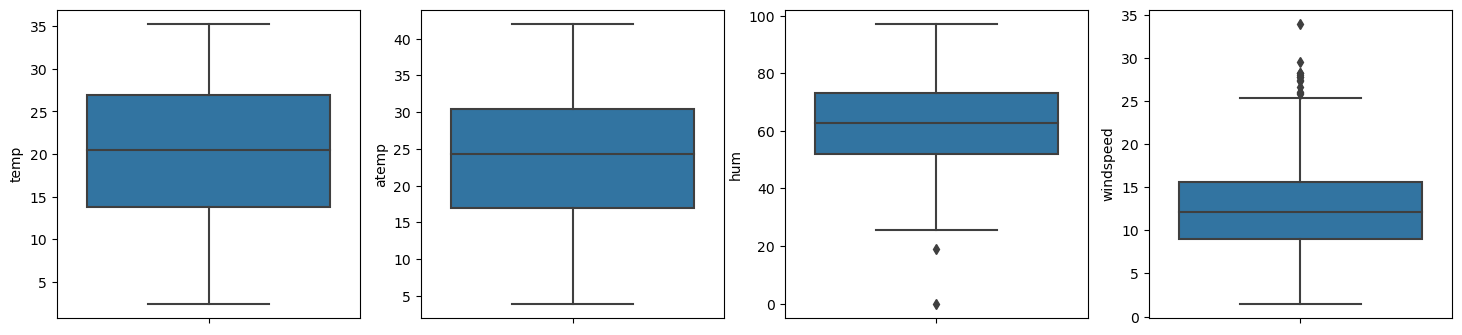

In [541]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

From this we can clearly observe there is no as such outlier issues hence no outlier treatment required

# 4. EDA

## 4.1 Convert season and weathersit to categorical types¶

In [542]:
bikeSharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharing_df.weathersit.replace({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'},inplace = True)

bikeSharing_df.mnth = bikeSharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})


bikeSharing_df.weekday = bikeSharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## 4.2 Draw pair Plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

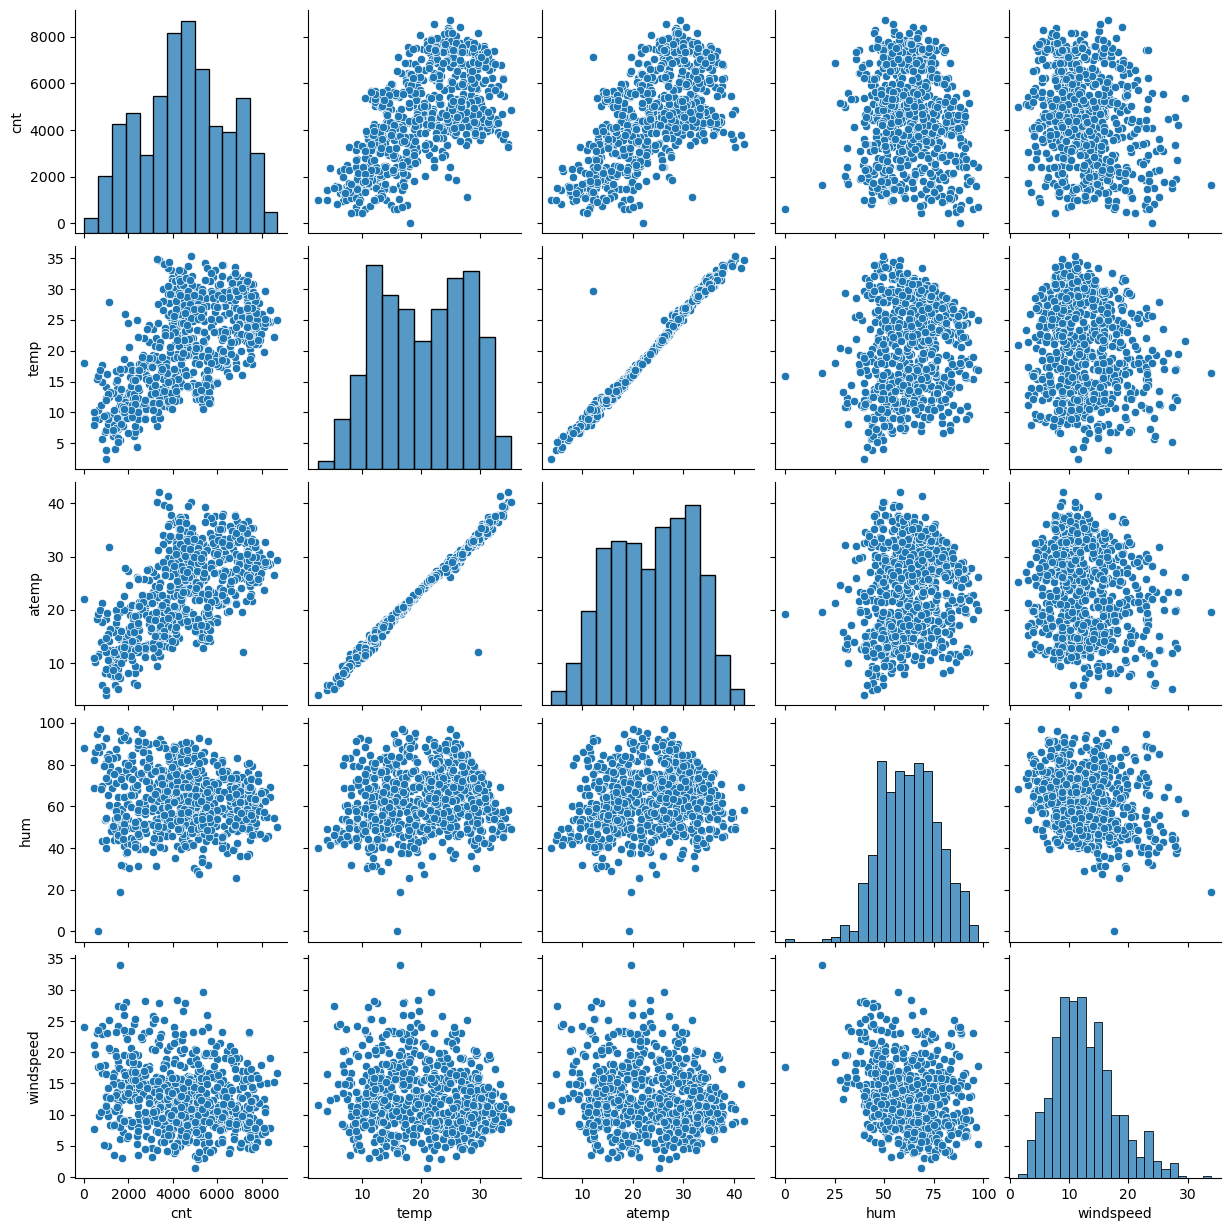

In [543]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Observations:

1. Looks like the temp and atemp has the highest corelation with the target variable cnt
2. temp and atemp are highly co-related with each other
Therefore as seen from the correlation map, output variable has a linear relationship with variables like temp, atemp

## 4.3 Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 2000x1500 with 0 Axes>

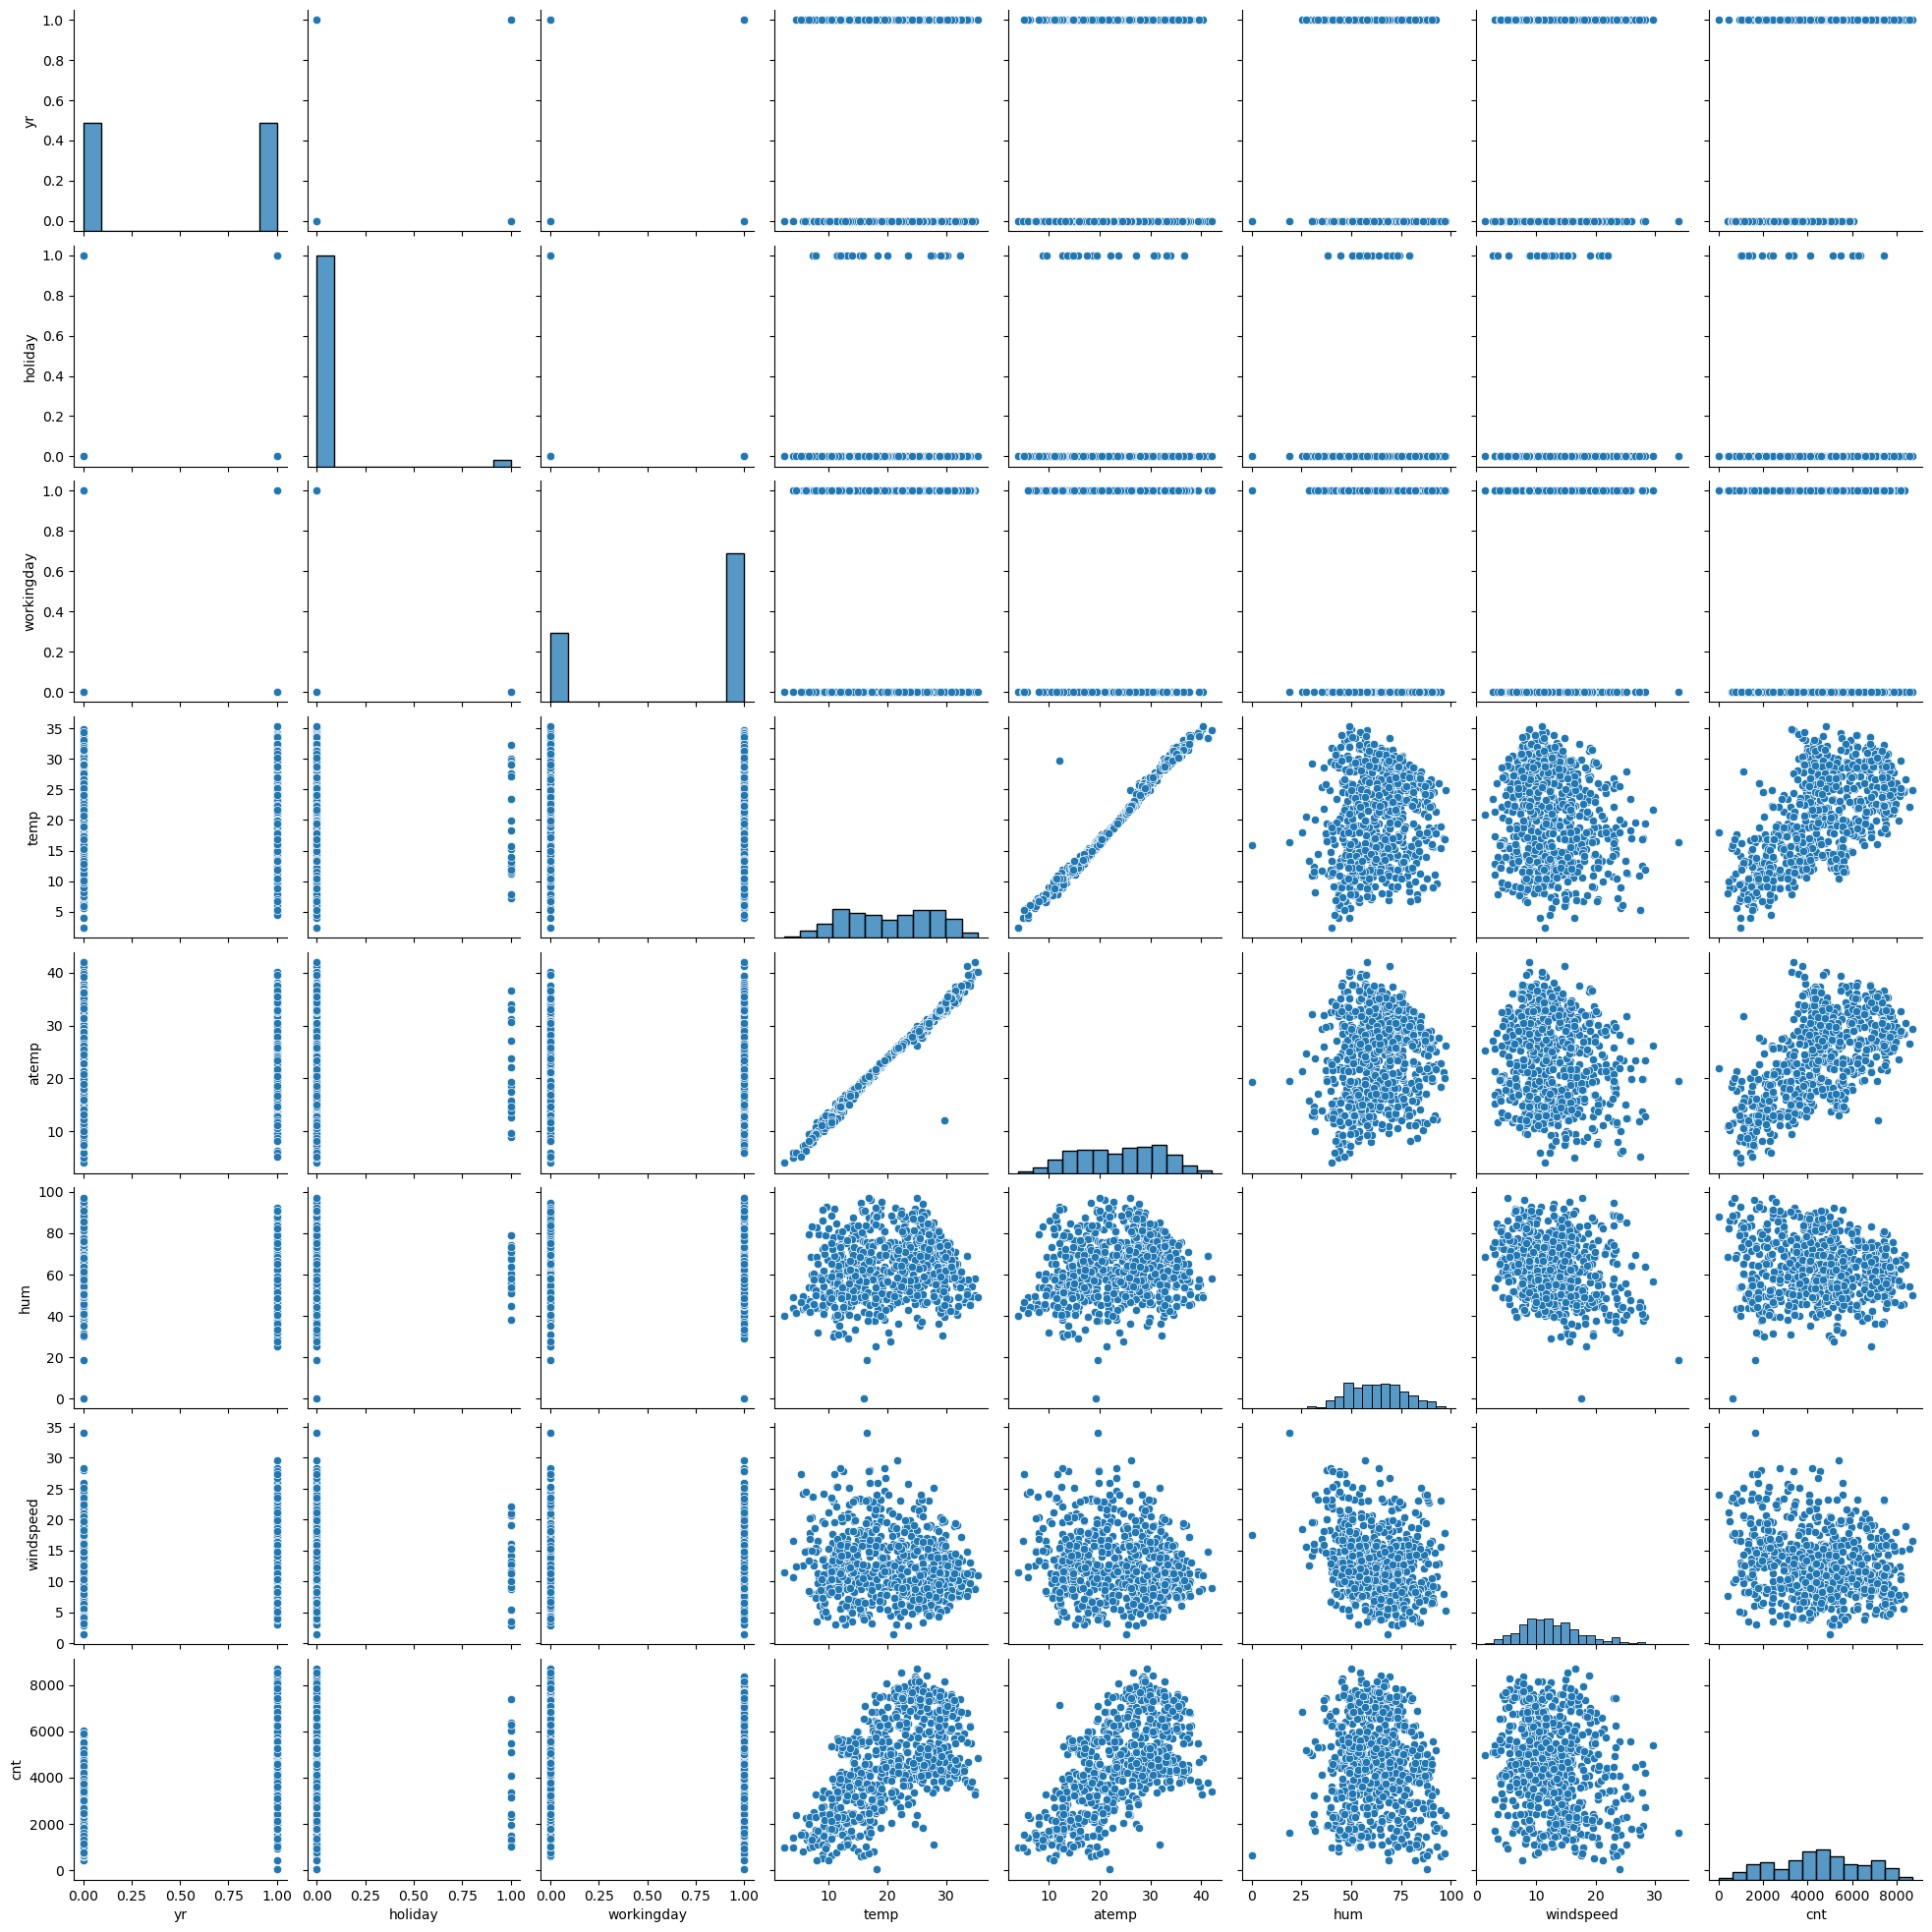

In [544]:
plt.figure(figsize=(20,15))
sns.pairplot(bikeSharing_df)
plt.show()

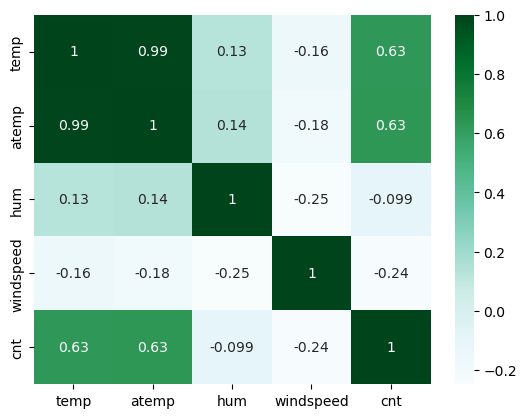

In [545]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

Here we observed that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

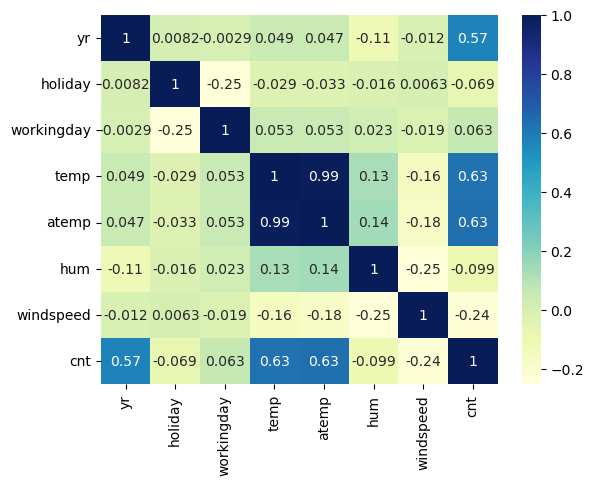

In [546]:
#Correlations for numeric variables
cor=bikeSharing_df.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

## 4.4 Draw Heatmap of correlation between variables

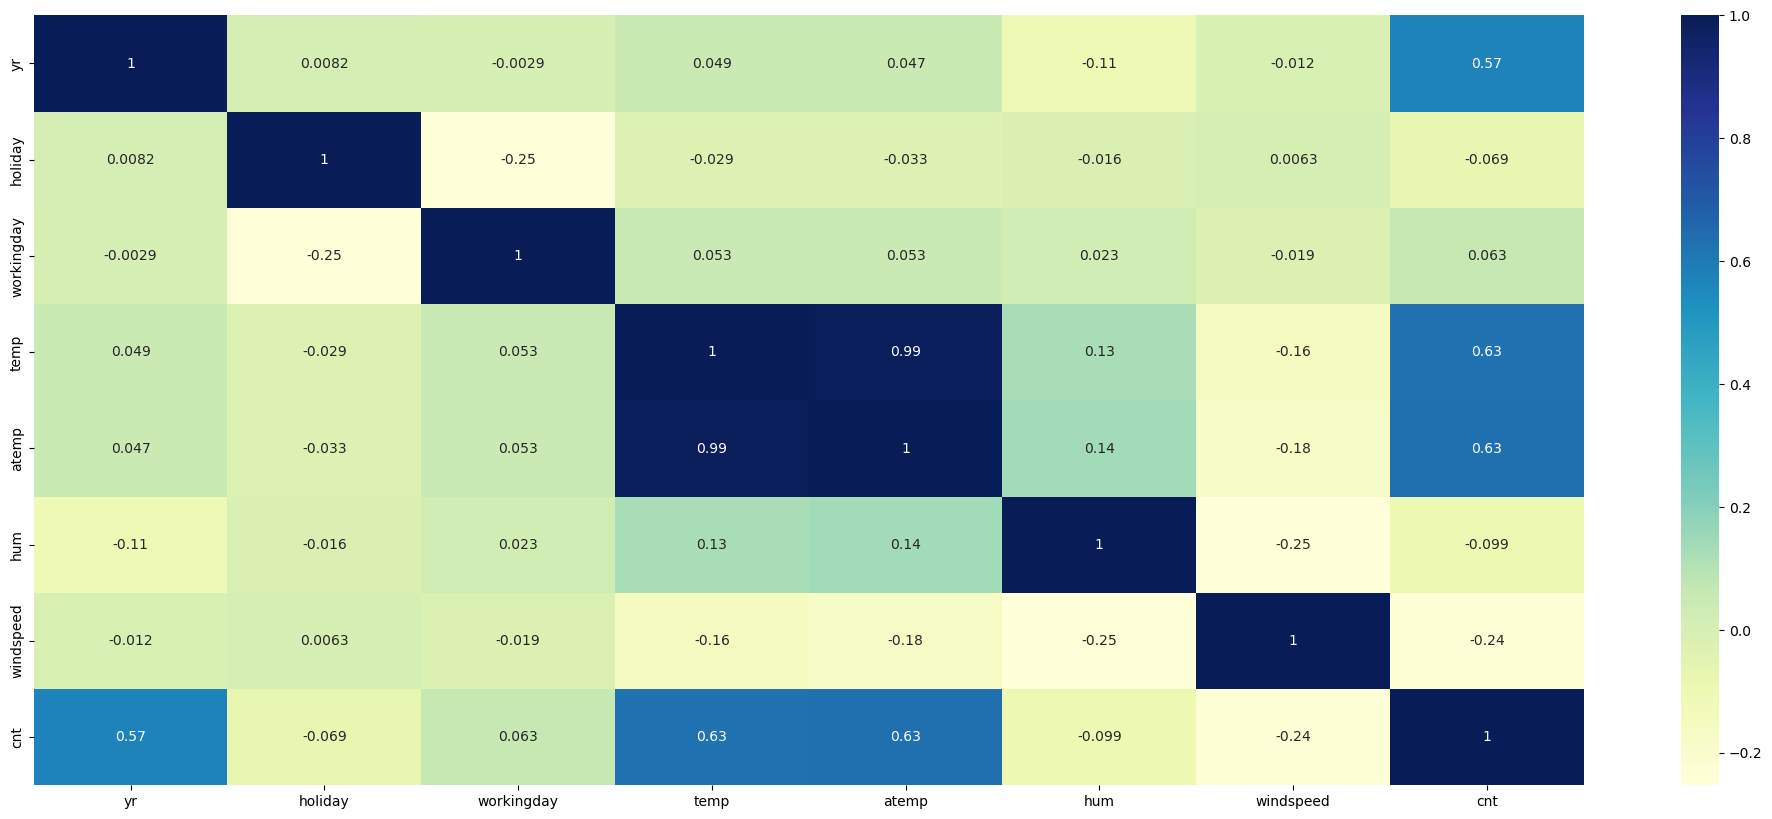

In [547]:
#Calculate Correlation
corr = bikeSharing_df.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

Observation:

1. Correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
2. We also see Target variable has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model.

## 4.5 Analysing Categorical Variabels with target variables

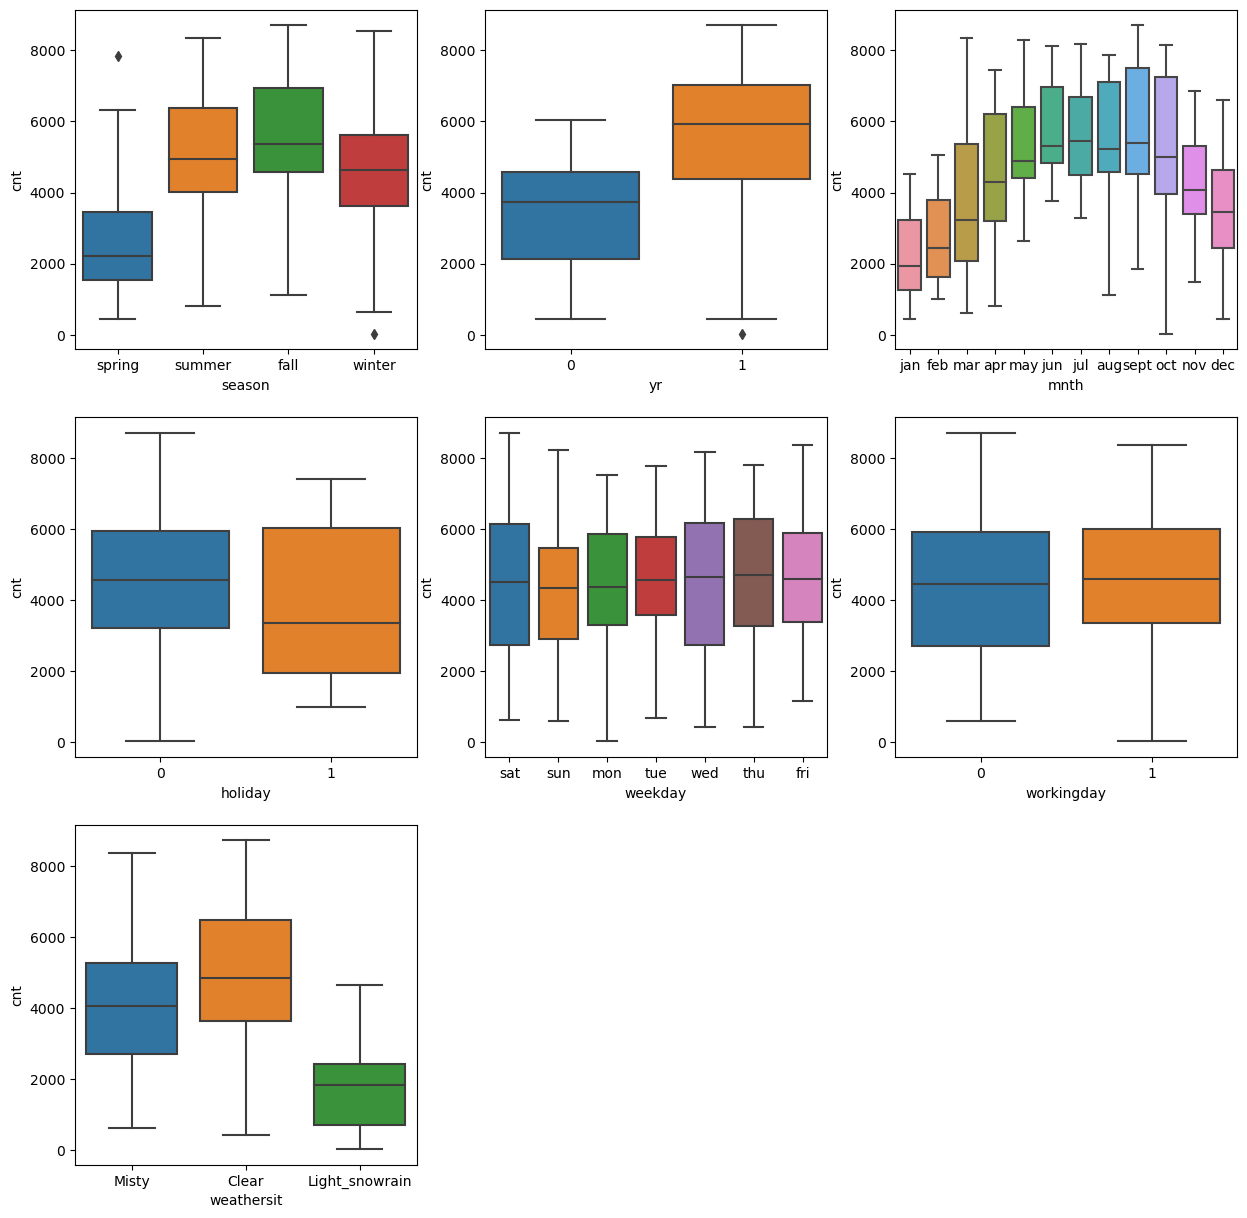

In [548]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()

Observations:

1. Season: 3:fall has highest demand for rental bikes
2. Demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions

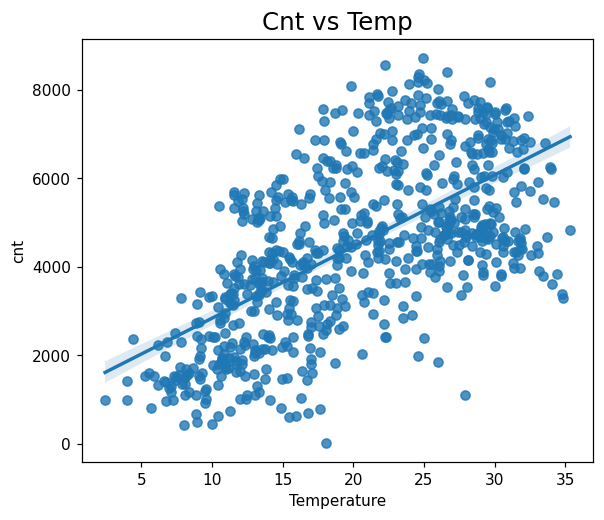

In [549]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

Observation:

1. Demand for bikes is positively correlated to temp.
2. cnt is linearly increasing with temp indicating linear relation.

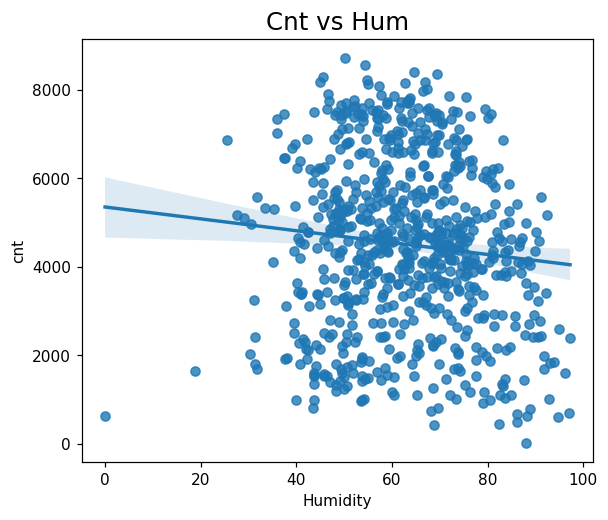

In [550]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

Observation:

1. Hum is values are more scattered around.
2. Although it seems cnt decreasing with increase in humidity.

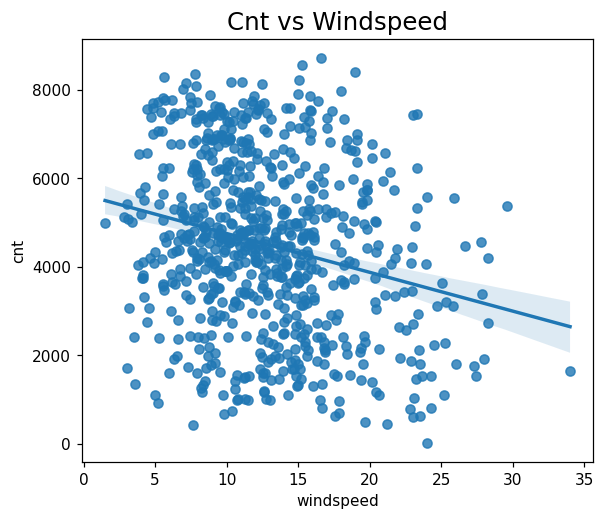

In [551]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.show()

Observation:

1. Windspeed is are more scattered around.
2. Although cnt decreasing with increase in windspeed.

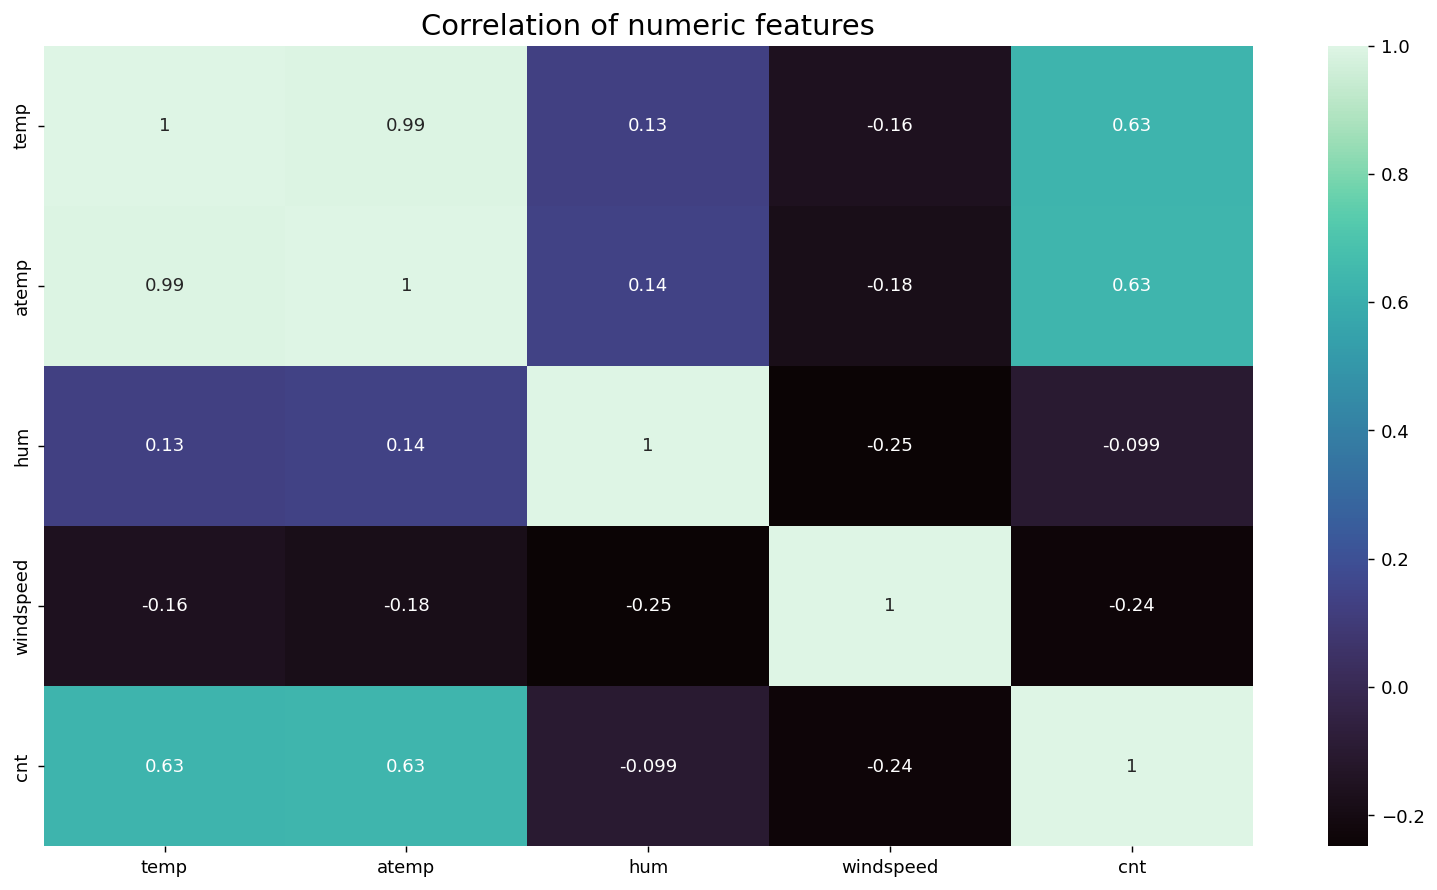

In [552]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bikeSharing_df[num_features].corr(),annot= True,cmap="mako")
plt.show()

Observations:

1. Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
2. Temp and Atemp also have high correlation with cnt variable.

In [553]:
bikeSharing_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# 5. Data Preparation for Linear Regression

## 5.1 Dummy variable creation for month, weekday, weathersit and season variables.

In [554]:
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","mnth","weekday","weathersit"],drop_first=True)

In [555]:
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [556]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    uint8  
 9   season_summer              730 non-null    uint8  
 10  season_winter              730 non-null    uint8  
 11  mnth_aug                   730 non-null    uint8  
 12  mnth_dec                   730 non-null    uint8  
 13  mnth_feb                   730 non-null    uint8  

# 6. Model Building

## 6.1 Split Data into training and test

In [557]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(bikeSharing_df, train_size = 0.7, random_state = 100)

In [558]:
# check the shape of training datatset
df_train.shape

(510, 30)

In [559]:
# check the shape of testing datatset
df_test.shape

(220, 30)

In [560]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [561]:
# verifying the head of dataset before scaling.
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [562]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [563]:
# verifying the head after appying scaling.
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [564]:
# describing the dataset
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


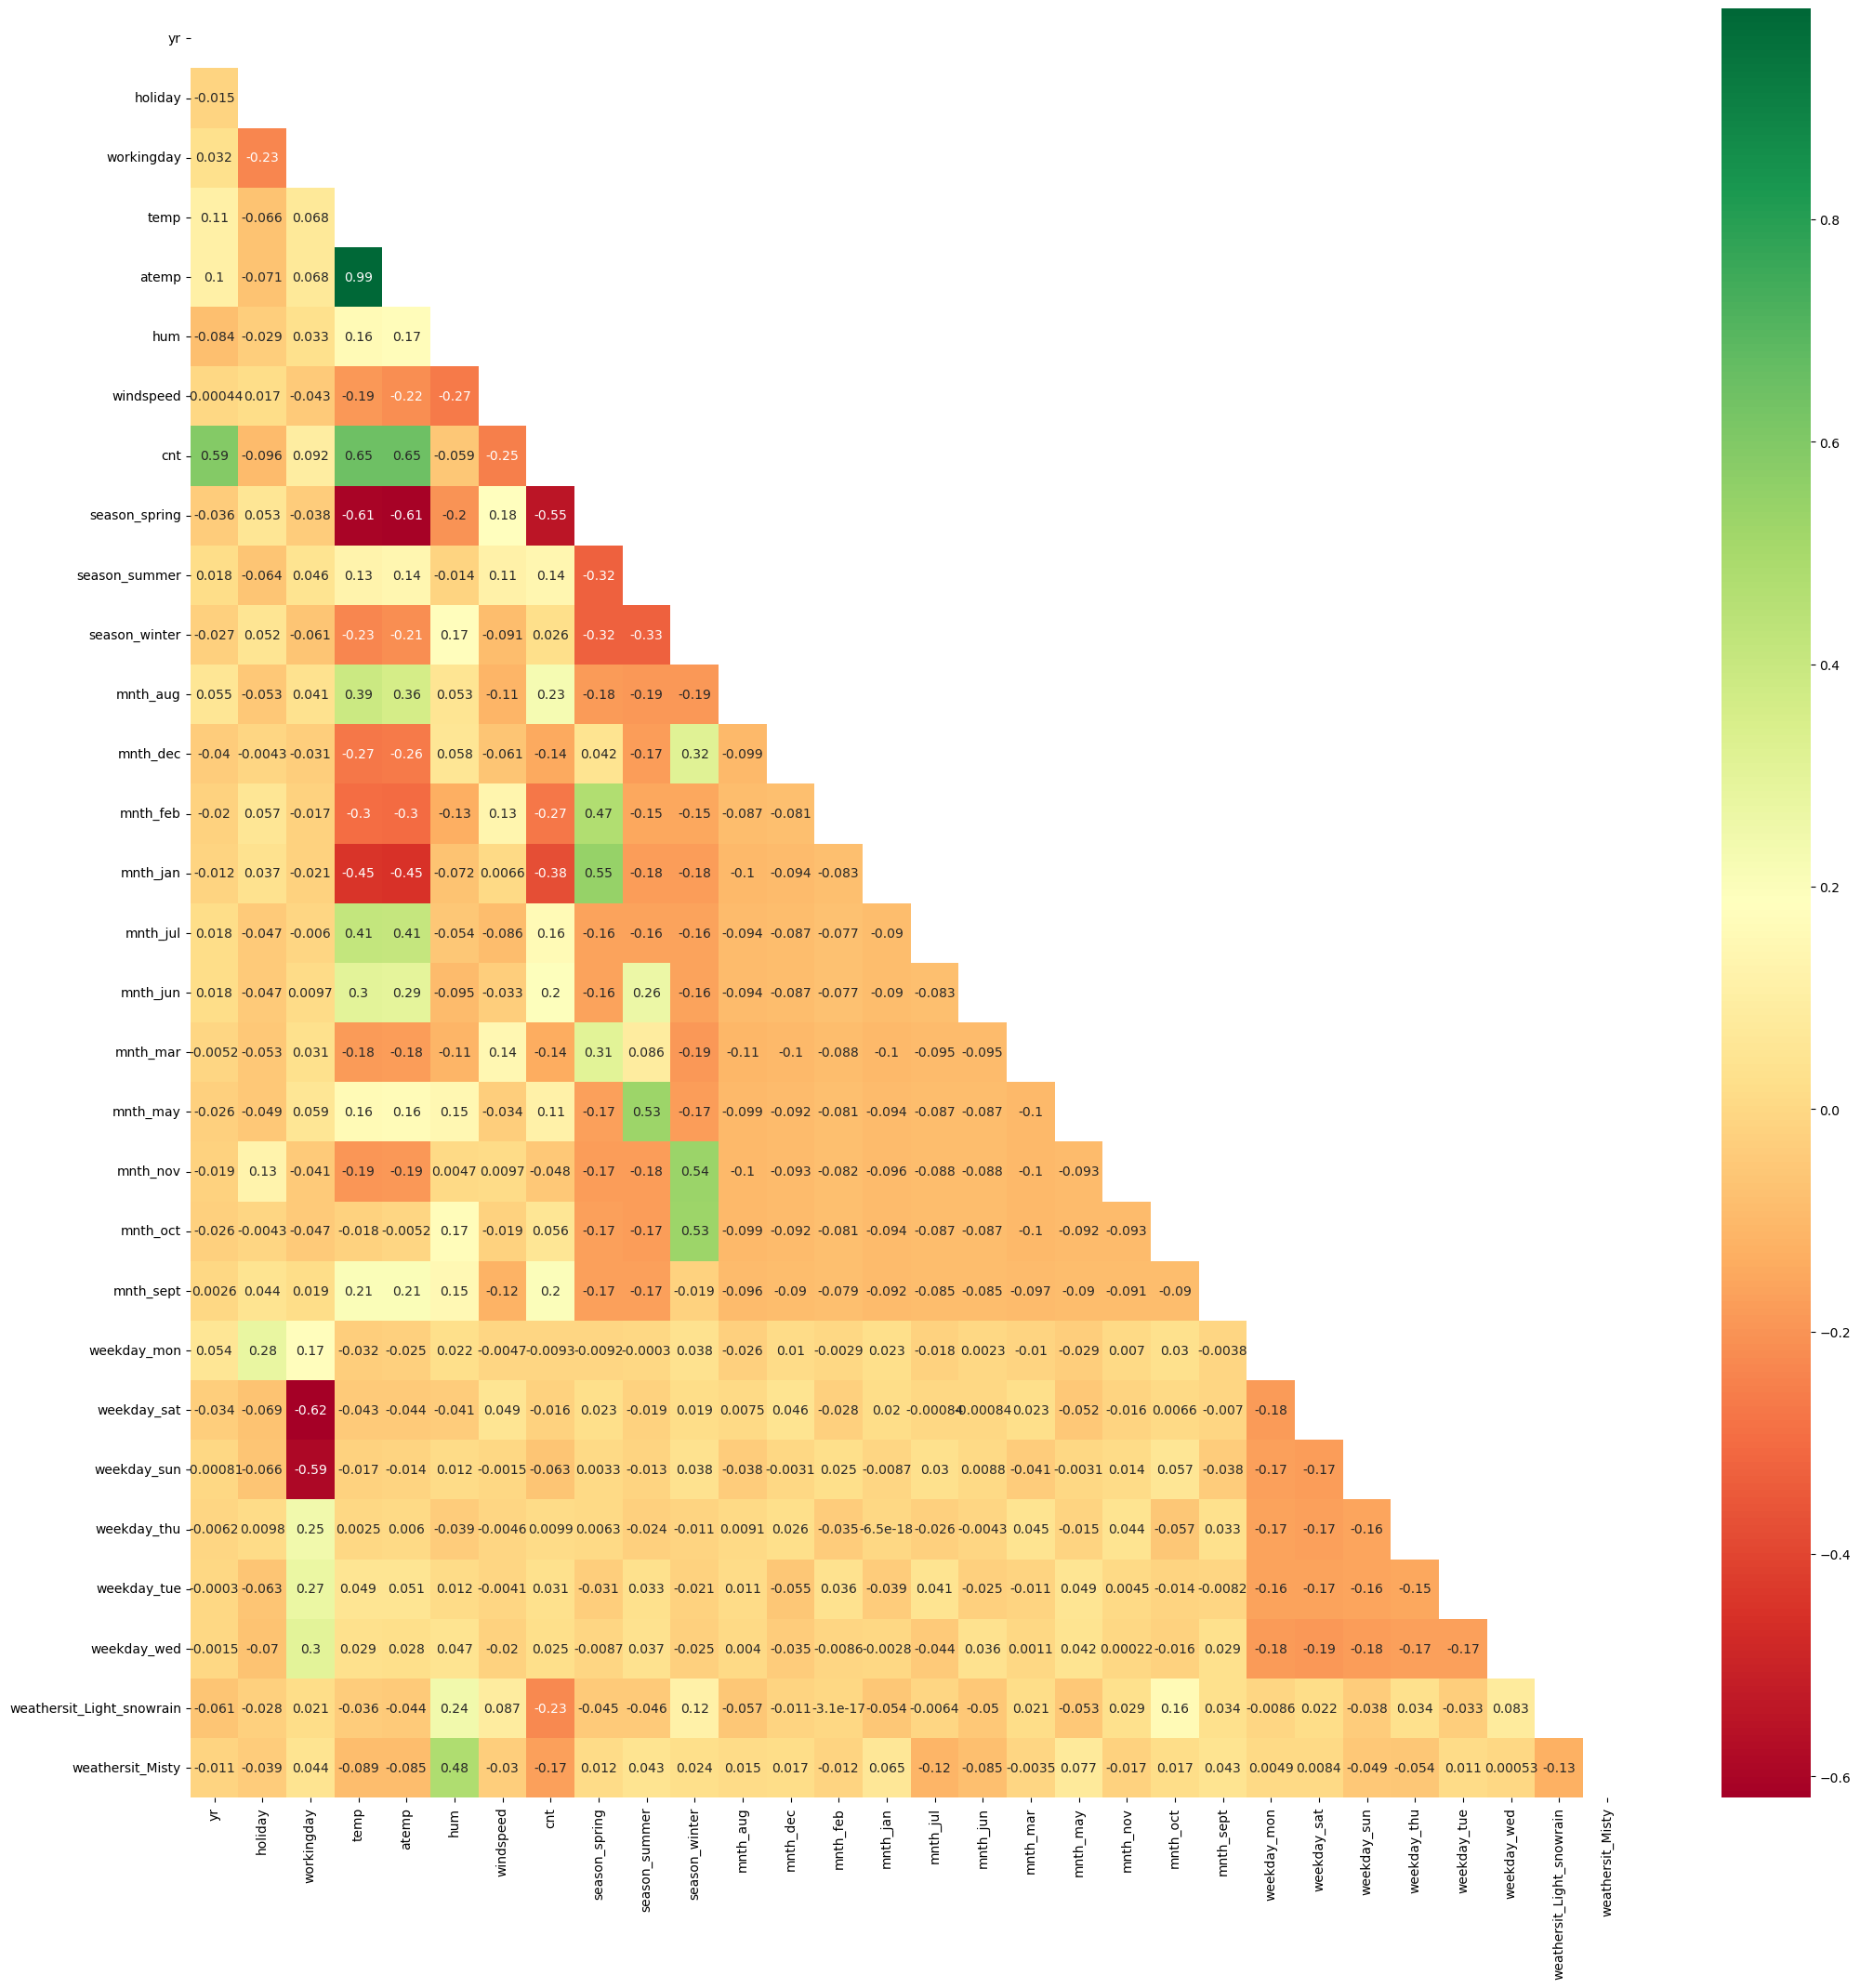

In [565]:
# check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

Observation:
1. cnt seems to have correlation with year variable and temp.
2. Misty and humidity show correlation. 
3. Spring season with Jan and Feb month, Summer season with may month
4. Winter season with oct and nov month show good correlation.

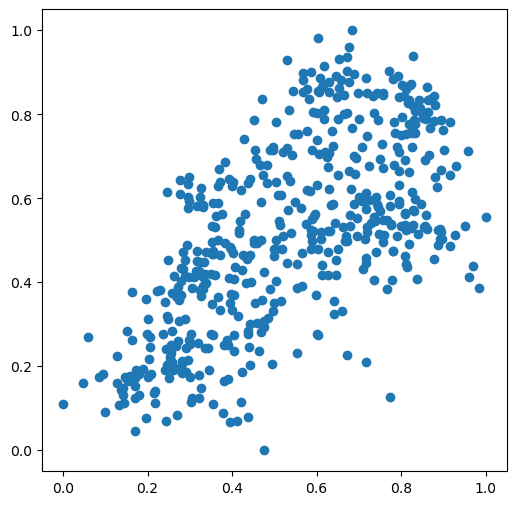

In [566]:
# Visualizing one of the correlation to see the trends via Scatter plot.
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

## 6.2 Build a Model using RFE and Automated approach

In [567]:
# Building the Linear Model
y_train = df_train.pop('cnt')
X_train = df_train

In [568]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [569]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 5),
 ('mnth_dec', False, 13),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 3),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 7),
 ('mnth_may', False, 4),
 ('mnth_nov', False, 10),
 ('mnth_oct', False, 2),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 12),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [570]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')


In [571]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [572]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [573]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [574]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
11,weekday_sat,12.20
12,weekday_sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.62
4,hum,1.91
14,weathersit_Misty,1.57


# 7 Build Model

## 7.1 Model 1

In [575]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

# calculate VIF
calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.11e-191
Time:                        00:11:59   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,workingday,50.68
11,weekday_sat,12.20
12,weekday_sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.62
4,hum,1.91
14,weathersit_Misty,1.57


## 7.2 Model 2 

In [576]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.11e-191
Time:                        00:12:00   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
3,hum,28.25
2,temp,16.06
4,windspeed,4.68
5,season_spring,4.03
7,season_winter,3.36
6,season_summer,2.79
13,weathersit_Misty,2.30
0,yr,2.08
8,mnth_jul,1.59
9,mnth_sept,1.39


## 7.3 Model 3

In [577]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.28e-188
Time:                        00:12:00   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,temp,5.18
3,windspeed,4.63
5,season_summer,2.24
4,season_spring,2.13
0,yr,2.07
6,season_winter,1.84
7,mnth_jul,1.59
12,weathersit_Misty,1.56
8,mnth_sept,1.34
9,weekday_sat,1.23


## 7.4 Model 4

In [578]:
# As Weekday_Sat shows high P values hence we can drop it
X_train_new = X_train_new.drop(['weekday_sat'], axis = 1)

# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.45e-189
Time:                        00:12:00   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,season_summer,2.24
4,season_spring,2.11
0,yr,2.07
6,season_winter,1.81
7,mnth_jul,1.59
11,weathersit_Misty,1.56
8,mnth_sept,1.34
9,weekday_sun,1.18


## 7.5 Model 5

In [579]:
# As mnth_jul shows high P values hence we can drop it
X_train_new = X_train_new.drop(['mnth_jul'], axis = 1)

# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.23e-189
Time:                        00:12:00   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,yr,2.07
4,season_spring,2.02
5,season_summer,1.91
6,season_winter,1.66
10,weathersit_Misty,1.55
7,mnth_sept,1.23
8,weekday_sun,1.18
9,weathersit_Light_snowrain,1.08


Observations:

1. VIF value now seems to be good as it came below 5.
2. Have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
3. Adj. R-squared value is 0.835 which is very good
4. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [580]:
# Checking the parameters and their coefficient values
lr_5.params

const                        0.198086
yr                           0.234000
holiday                     -0.104300
temp                         0.478161
windspeed                   -0.148022
season_spring               -0.054372
season_summer                0.062284
season_winter                0.096907
mnth_sept                    0.089359
weekday_sun                 -0.049479
weathersit_Light_snowrain   -0.290403
weathersit_Misty            -0.080899
dtype: float64

# 8. Model Evaluation

## 8.1 Residucal Analysis

In [581]:
y_train_pred = lr_5.predict(X_train_lm_5)

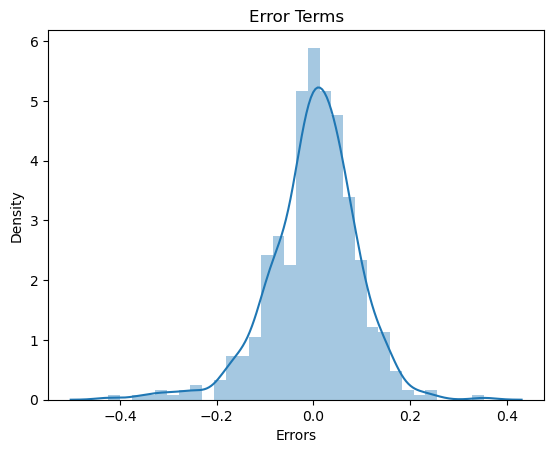

In [582]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

plot_res_dist(y_train, y_train_pred)

Observed errors are normally distribured here with mean 0. So everything seems to be fine

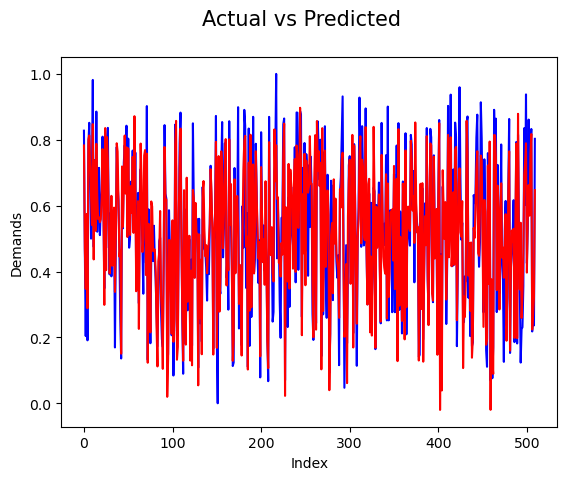

In [583]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train_lm_5),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model seems ok

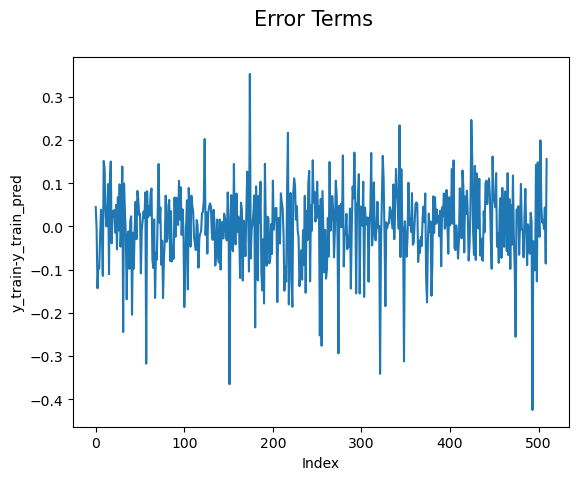

In [584]:
# Error Terms
c = [i for i in range(0,len(X_train_lm_5),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Here we observes the error terms are independent of each other.

# 8.2 Linearity Check

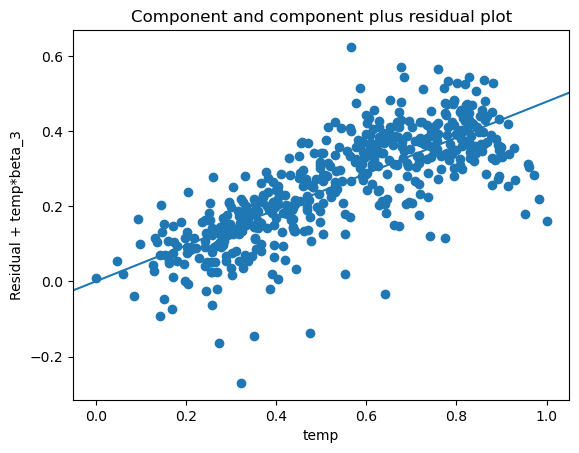

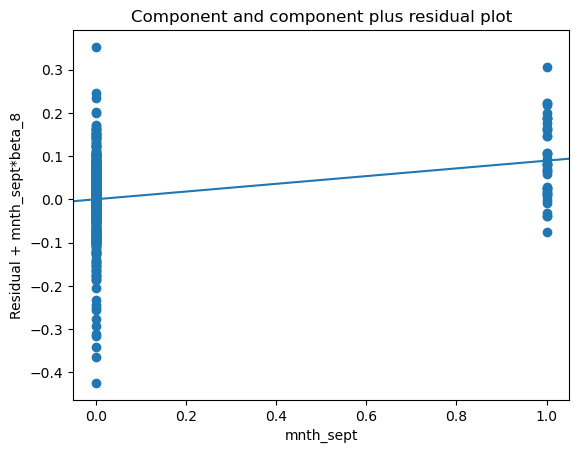

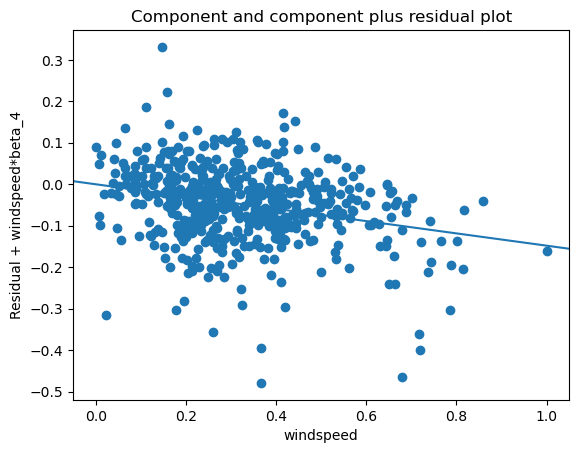

In [585]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'mnth_sept')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

In [586]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8386034883983227

From above we observed R2 Same as we obtained for our final model

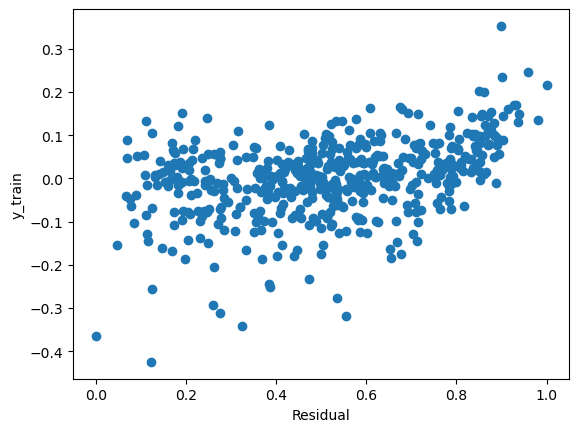

In [587]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

# 9. Predicting Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 5th model.

In [588]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [589]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [590]:
y_test = df_test.pop('cnt')

In [591]:
col1 = X_train_new.columns

In [592]:
X_test = X_test[col1]

In [593]:
# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [594]:
y_pred = lr_5.predict(X_test_lm_5)

In [595]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8066

# 10. Intrepretting the Model

Ploting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

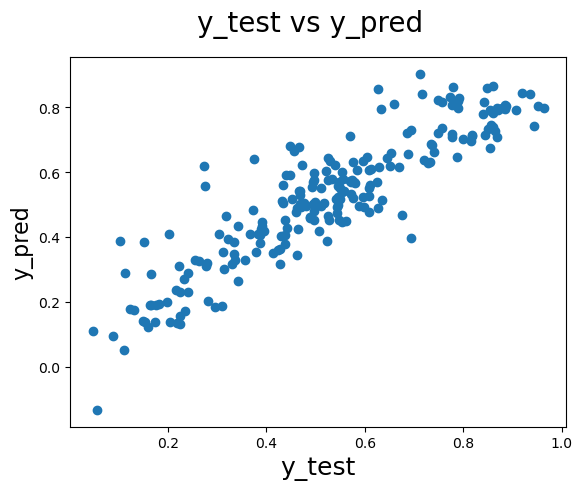

In [596]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [597]:
round(lr_5.params,4)

const                        0.1981
yr                           0.2340
holiday                     -0.1043
temp                         0.4782
windspeed                   -0.1480
season_spring               -0.0544
season_summer                0.0623
season_winter                0.0969
mnth_sept                    0.0894
weekday_sun                 -0.0495
weathersit_Light_snowrain   -0.2904
weathersit_Misty            -0.0809
dtype: float64

In [598]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7963


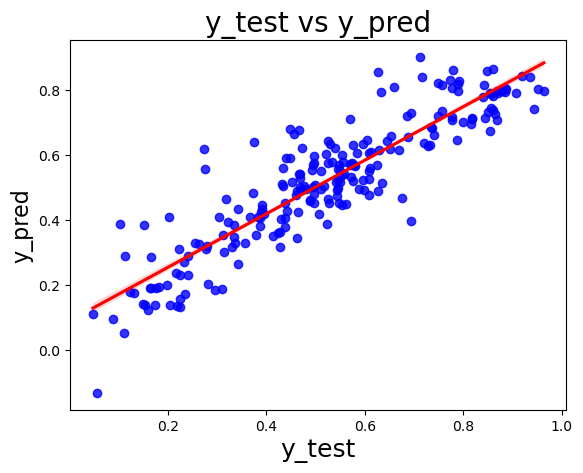

In [599]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.839
- Test dataset R^2           : 0.8066
- Train dataset Adjusted R^2 : 0.835    
- Test dataset Adjusted R^2  : 0.7963

Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.